# Data wrangling

Data wrangling, also known as data munging, is the process of cleaning, structuring, and organizing raw data into a format suitable for analysis.

 It involves transforming and mapping data from its raw form into another format to make it more appropriate and valuable for a variety of downstream purposes, such as analysis or visualization.


# Data wrangling (Key Activities)

Handling missing or inconsistent data.\
Transforming variables or features.\
Merging or joining datasets.\
Reshaping data (e.g., pivoting, melting).


# Data wrangling (steps)
Importing necessary libraries such as Pandas, NumPy, and Matplotlib.\
Loading the data into a Pandas DataFrame.\
Assessing the data for missing values, outliers, and inconsistencies.\
Cleaning the data by filling in missing values, removing outliers, and correcting errors.\
Organizing the data by creating new columns, renaming columns, sorting, and filtering the data.\
Storing the cleaned data in a format that can be used for future analysis, such as a CSV or Excel file.\
Exploring the data by creating visualizations and using descriptive statistics.\
Creating a pivot table to summarize the data.\
Checking for and handling duplicate rows.\
Encoding categorical variables.\
Removing unnecessary columns or rows.\
Merging or joining multiple datasets\
Handling missing or null values\
Reshaping the data\
Formatting the data\
Normalizing or scaling the data\
Creating new features from existing data\
Validating data integrity\
Saving the final data for future use\
Documenting the data wrangling process for reproducibility



# Data mining 
is the process of discovering patterns, relationships, and information from large amounts of data. It involves extracting valuable insights or knowledge from data using various techniques, including statistical analysis, machine learning, and pattern recognition.
# Key Activities
Exploratory Data Analysis (EDA).\
Feature extraction and selection.\
Pattern recognition and clustering.\
Predictive modeling and classification.


# Data Cleaning
Data cleaning is the process of identifying and correcting (or removing) errors and inconsistencies in datasets. The goal is to improve the quality of the data by addressing issues such as missing values, duplicates, outliers, and inaccuracies.
# Key Activities:
Handling missing data (imputation or removal).\
Identifying and removing duplicate records.\
Detecting and addressing outliers.\
Standardizing and validating data formats.\
Correcting errors and inconsistencies.



In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
titanic=sns.load_dataset('titanic')
titanic.rename(columns={"sex": "gender"}, inplace=True)

In [97]:
titanic.drop(['deck'],axis=1,inplace=True)

In [98]:
titanic.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [99]:
#use loc function to select rows and columns by label
titanic.loc[0:4,'age':"fare"]

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [100]:
# use iloc function to select rows and columns by position
titanic.iloc[0:4,0:4]

,survived,pclass,gender,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0


In [101]:
# if we wanti to excess from 0 to 4 rows then 8 to 12 rows and 0 to 4 columns using loc function
titanic.loc[np.r_[0:4,8:12],['age','fare']]

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
8,27.0,11.1333
9,14.0,30.0708
10,4.0,16.7000
11,58.0,26.5500


In [102]:
# if we wanti to excess from 0 to 4 rows then 8 to 12 rows and 0 to 4 columns
titanic.iloc[np.r_[0:4,8:12],0:4]


,survived,pclass,gender,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
8,1,3,female,27.0
9,1,2,female,14.0
10,1,3,female,4.0
11,1,1,female,58.0


<Axes: xlabel='gender', ylabel='age'>

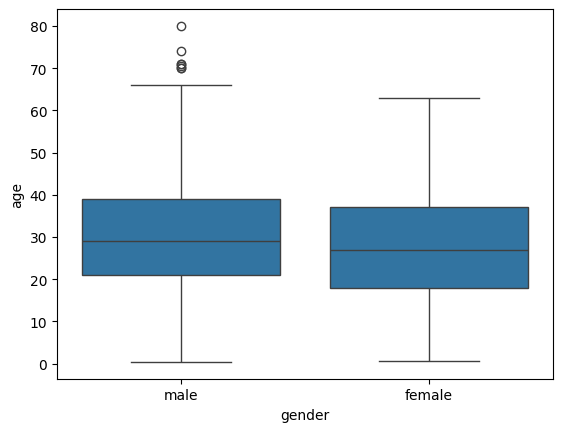

In [103]:
sns.boxplot(titanic, x='gender', y="age")

In [104]:
# Inter quartile range method
Q1=titanic['age'].quantile(0.25)
Q3=titanic['age'].quantile(0.75) 
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [105]:
titanic=titanic[(titanic['age']>lower_limit) & (titanic['age']<upper_limit)]

In [106]:
Q1=titanic['fare'].quantile(0.25)
Q3=titanic['fare'].quantile(0.75) 
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
titanic=titanic[(titanic['fare']>lower_limit) & (titanic['fare']<upper_limit)]

In [107]:
titanic.shape

(607, 14)

In [108]:
from scipy import stats

In [109]:
titanic_duplicates=titanic[titanic.duplicated()]
titanic_duplicates.shape

(38, 14)

In [110]:
titanic.drop_duplicates(inplace=True)

In [111]:
titanic.shape

(569, 14)

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
titanic[['age','fare']]=scaler.fit_transform(titanic[['age','fare']])
titanic

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.339415,1,0,0.104618,S,Third,man,True,Southampton,no,False
2,1,3,female,0.402328,0,0,0.114358,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.543882,1,0,0.766234,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.543882,0,0,0.116162,S,Third,man,True,Southampton,no,True
6,0,1,male,0.842718,0,0,0.748377,S,First,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,0.433784,0,0,0.151515,S,Second,man,True,Southampton,no,True
885,0,3,female,0.606795,0,5,0.420274,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.292230,0,0,0.432900,S,First,woman,False,Southampton,yes,True
889,1,1,male,0.402328,0,0,0.432900,C,First,man,True,Cherbourg,yes,True


In [113]:
# Code to inverse transform the scaled data of age and fare in dataset of titanic
titanic[['age','fare']] = scaler.inverse_transform(titanic[['age','fare']])



In [114]:
titanic.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True


# Organizing the data

In [115]:
titanic["family"]=titanic['sibsp']+titanic['parch']

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='gender', ylabel='family'>

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 70.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


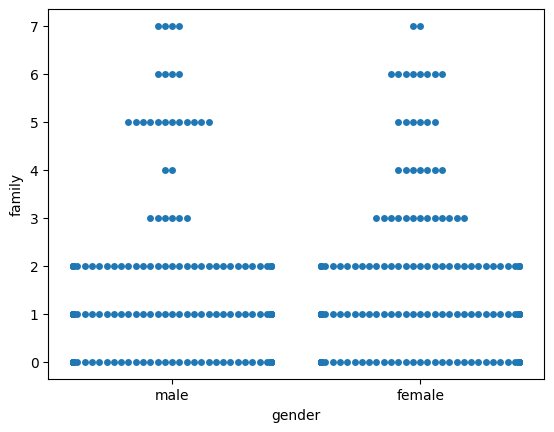

In [116]:
import seaborn as sns
sns.swarmplot(data=titanic, x="gender", y="family")

<Axes: xlabel='gender', ylabel='age'>

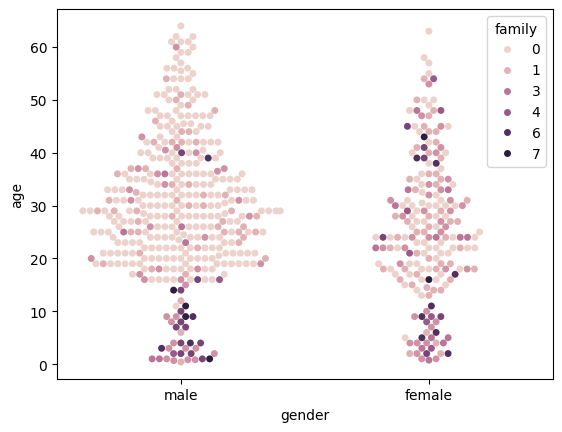

In [117]:
sns.swarmplot(data=titanic, x="gender", y="age",hue='family')

In [118]:
table=pd.pivot_table(titanic, values="fare", index="pclass", columns="survived", aggfunc=np.sum)
table

C:\Users\adeel\AppData\Local\Temp\ipykernel_11268\2608787661.py:1: FutureWarning: The provided callable <function sum at 0x0000025DEDC15800> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table=pd.pivot_table(titanic, values="fare", index="pclass", columns="survived", aggfunc=np.sum)


survived,0,1
pclass,,
1,1296.7457,2100.7253
2,1329.9458,1784.1334
3,3382.7205,1062.0917


# Feature Scaling
Feature scaling is a preprocessing technique used in machine learning to standardize or normalize the range of independent variables or features of a dataset.

The goal is to bring all features to a similar scale to prevent some features from dominating or having undue influence on the learning algorithm.
 
Feature scaling is particularly important for algorithms that are sensitive to the scale of input features, such as gradient-based optimization algorithms in machine learning.


## 1. Min Max Scaling
Scales the values between 0 and 1.
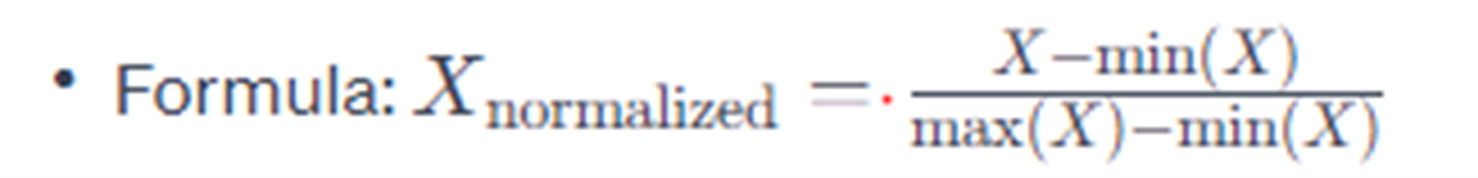

In [119]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Sample data
data = {'numbers': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)
df.head()

,numbers
0,10
1,20
2,30
3,40
4,50


In [120]:
# scale the data using min max scalar
scaler = MinMaxScaler()
df['numbers_scaled'] = scaler.fit_transform(df[['numbers']])
df.head()

,numbers,numbers_scaled
0,10,0.00
1,20,0.25
2,30,0.50
3,40,0.75
4,50,1.00


# 2. Standard Scalar or Z-score normalization
Scales the values to have a mean of 0 and a standard deviation of 1
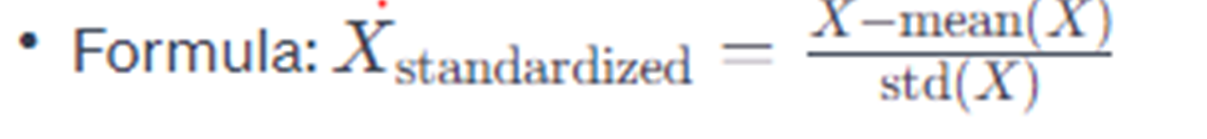

In [121]:
# scale the data using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['numbers_scaled'] = scaler.fit_transform(df[['numbers']])
df.head()

,numbers,numbers_scaled
0,10,-1.414214
1,20,-0.707107
2,30,0.000000
3,40,0.707107
4,50,1.414214


# 3. Robust scalar
Scales the data based on the interquartile range (IQR).\
Robust to outliers.
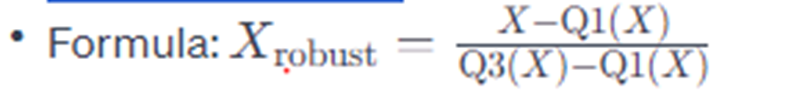


In [122]:
from sklearn.preprocessing import RobustScaler
# Sample data with outliers

# Robust Scaling
scaler = RobustScaler()
df['numbers_scaled'] = scaler.fit_transform(df[['numbers']])
print(df)

   numbers  numbers_scaled
0       10            -1.0
1       20            -0.5
2       30             0.0
3       40             0.5
4       50             1.0


# 4. Logrithmic scaling/ Normalization
Logarithmic scaling, also known as logarithmic normalization, is a type of feature scaling that involves applying a logarithmic transformation to the values of a variable.\
 The logarithmic function used is typically the natural logarithm (base e) or the common logarithm (base 10).
 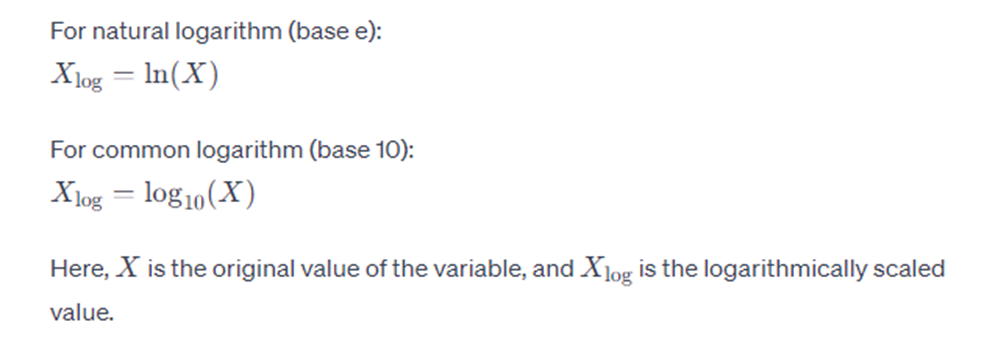


In [123]:
import numpy as np
import pandas as pd

#random data with outliers

# Log Transform
df['numbers_log'] = np.log(df['numbers'])
df['numbers_log2'] = np.log2(df['numbers'])
df['numbers_log10'] = np.log10(df['numbers'])
df.head()

,numbers,numbers_scaled,numbers_log,numbers_log2,numbers_log10
0,10,-1.0,2.302585,3.321928,1.000000
1,20,-0.5,2.995732,4.321928,1.301030
2,30,0.0,3.401197,4.906891,1.477121
3,40,0.5,3.688879,5.321928,1.602060
4,50,1.0,3.912023,5.643856,1.698970


# Feature Encoding
Feature encoding, also known as feature representation, is the process of transforming categorical or non-numeric data into a numerical format that can be used as input for machine learning algorithms.
 
Many machine learning models require numerical input, and feature encoding is essential when dealing with categorical variables or non-numeric data types



# 1. One hot encoding
   Represents each category as a binary vector. For each category, one binary variable is set to 1, and the others are set to 0.
   

In [124]:
import pandas as pd
# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)
print(df)
# One-Hot Encoding
encoded_data = pd.get_dummies(df, columns=['Color'])
print(encoded_data)

   Color
0    Red
1  Green
2   Blue
3    Red
   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False        False       True


# 2. Label Encoding
Assigns a unique integer to each category. This is suitable when there is an inherent ordinal relationship among categories.


In [125]:
from sklearn.preprocessing import LabelEncoder
# Sample data
data = {'Animal': ['Dog', 'Cat', 'Bird', 'Dog', "lion"]}
df = pd.DataFrame(data)
print(df)

# Label Encoding
label_encoder = LabelEncoder()
df['Animal_encoded'] = label_encoder.fit_transform(df['Animal'])
print(df)

  Animal
0    Dog
1    Cat
2   Bird
3    Dog
4   lion
  Animal  Animal_encoded
0    Dog               2
1    Cat               1
2   Bird               0
3    Dog               2
4   lion               3


# 3.Ordinal Encoding
Assigns integers to categories based on their ordinal relationship. This is suitable when the categories have a meaningful order.


In [126]:
from sklearn.preprocessing import OrdinalEncoder
# Sample data
data = {'Size': ['Small', 'Medium', 'Large', 'Medium']}
df = pd.DataFrame(data)
print(df)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])
df['Size_encoded'] = ordinal_encoder.fit_transform(df[['Size']])
print(df)

     Size
0   Small
1  Medium
2   Large
3  Medium
     Size  Size_encoded
0   Small           0.0
1  Medium           1.0
2   Large           2.0
3  Medium           1.0
